<a href="https://colab.research.google.com/github/alibelhrak/NLP_Project-2024_US_Election_Sentiment_on_X/blob/main/2024_US_Election_Sentiment_on_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nesta3malha bech n'importi dataset mn kaggle walla ay blassa maghir mano93ed nsob 3al locale

In [1]:
pip install opendatasets



*  US Tweets Election Dataset Loading


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alibelhrak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x


100%|██████████| 14.5k/14.5k [00:00<00:00, 5.01MB/s]

# Importing Libraries

 * matplotlib.pyplot as plt : Used for plotting graphs and visualizing data (eg., line charts, histograms).

* numpy as np : Supports numerical operations and array manipulation.

* pandas as pd : Handles data in tabular form (like CSV files), useful for analysis and cleaning.

* seaborn as sns : Creates attractive and informative statistical graphics, often used with pandas.

* tensorflow as tf : Framework for building and training machine learning/deep learning models.

* from tensorflow import keras : Simplifies neural network building using TensorFlow's high-level API.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

* This Kaggle Dataset is separated into three files , training file , validarion and test file

In [4]:
df_train = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/train.csv')
df_val = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/val.csv')
df_test = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/test.csv')

* Comprehensive Candidate Coverage: Includes data on major contenders such as Kamala Harris (Democratic Party), Donald Trump (Republican Party), Jill Stein (Green Party), Chase Oliver (Libertarian Party), and Robert Kennedy (Independent).

In [5]:
df_train


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


** We have Candidate , Party , sentiment **

In [6]:
df_train['candidate'].value_counts()

,count
candidate,
Kamala Harris,100
Donald Trump,100
Jill Stein,100
Robert Kennedy,100
Chase Oliver,100


In [7]:
df_train['sentiment'] = df_train['sentiment'].str.strip().str.lower()
df_val['sentiment'] = df_val['sentiment'].str.strip().str.lower()
df_test['sentiment'] = df_test['sentiment'].str.strip().str.lower()
df_train['sentiment'].value_counts()


,count
sentiment,
positive,329
neutral,126
negative,45


# Data Preparation

**Tweet**

In [8]:
df_train_text = df_train['tweet_text']
df_valid_text = df_val['tweet_text']
df_test_text = df_test['tweet_text']

* l part hethi bech na3mlo cleaning l text

In [35]:
import re

# Hethi l Cleaning Function
def Cleaning_Texted_data(text):
  text = text.lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  return text

# Tw Appliquiha 3al texts
df_train_clean_text = df_train_text.apply(Cleaning_Texted_data)
df_valid_clean_text = df_valid_text.apply(Cleaning_Texted_data)
df_test_clean_text = df_test_text.apply(Cleaning_Texted_data)


* lehne bech na3mlo encoding ll party wel sentiment

In [37]:
from sklearn.preprocessing import LabelEncoder

le_party = LabelEncoder()
df_train['party_encoded'] = le_party.fit_transform(df_train['party'])

# Map sentiment to numerical values for evaluation
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_train['sentiment_encoded'] = df_train['sentiment'].map(sentiment_mapping)

# Split back into train, test, val
train = df_train.iloc[:500].copy()
test = df_train.iloc[500:550].copy()
val = df_train.iloc[550:600].copy()

# Display encoded features
train[['party', 'party_encoded', 'sentiment', 'sentiment_encoded']].head()

,party,party_encoded,sentiment,sentiment_encoded
0,Democratic Party,0,positive,2
1,Republican Party,4,positive,2
2,Green Party,1,positive,2
3,Independent,2,neutral,1
4,Libertarian Party,3,positive,2


* menhne bech nebdew na3mlo ta7thir ll text fi chakl seq w padded bech najmo nkhaliw l model ya9rah w ya3ml l predictions te3o

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df_train_clean_text)

train_sequences = tokenizer.texts_to_sequences(df_train_clean_text)
valid_sequences = tokenizer.texts_to_sequences(df_valid_clean_text)
test_sequences = tokenizer.texts_to_sequences(df_test_clean_text)


train_padded = pad_sequences(train_sequences, maxlen=50, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=50, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post')


all_labels = list(df_train['sentiment']) + list(df_val['sentiment']) + list(df_test['sentiment'])

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['sentiment'])
valid_labels = label_encoder.transform(df_val['sentiment'])
test_labels = label_encoder.transform(df_test['sentiment'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = np.array(train_labels).reshape(-1, 1)
valid_labels = np.array(valid_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)

print("Train input shape:", train_padded.shape)
print("Train label shape:", train_onehot_labels.shape)
print("Validation input shape:", valid_padded.shape)
print("Validation label shape:", valid_onehot_labels.shape)
print("Test input shape:", test_padded.shape)
print("Test label shape:", test_onehot_labels.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)
Test input shape: (50, 50)
Test label shape: (50, 3)


* Lehne bech na3ml l vectorization bech najem ndakhel l inputs ll model

In [42]:
vocab_size = len(tokenizer.word_index) + 1
train_input = np.array(train_padded)
sequence_length = train_input.shape[1]

val_input = np.array(valid_padded)
test_input = np.array(test_padded)

train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

# bech tetchecki el  shapes
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)
Test input shape: (50, 50)
Test label shape: (50, 3)


In [43]:
print(label_encoder.classes_)


['negative' 'neutral' 'positive']


# Creating The Model

In [45]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# This is optional if the model still shows 0 params
model.build(input_shape=(None, sequence_length))

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 50, 128)        │        56,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 50, 128)        │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,675 (768.26 KB)

 Trainable params: 196,675 (768.26 KB)

 Non-trainable params: 0 (0.00 B)

* bech tkhali l inputs y walliw arrays

In [47]:
train_input = np.array(train_input, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)

val_input = np.array(val_input, dtype=np.float32)
val_label = np.array(val_label, dtype=np.float32)

test_input = np.array(test_input, dtype=np.float32)
test_label = np.array(test_label, dtype=np.float32)

* bech ncompli l model

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
print("Train label shape:", train_label.shape)
print("Validation label shape:", val_label.shape)


Train label shape: (500, 3)
Validation label shape: (50, 3)


In [50]:
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)


In [51]:
history = model.fit(
    train_input,
    train_label,
    epochs=64,
    batch_size=32,
    validation_data=(test_input, test_label)
)


Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.6739 - loss: 0.9320 - val_accuracy: 0.6800 - val_loss: 0.7396
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.6677 - loss: 0.7544 - val_accuracy: 0.8800 - val_loss: 0.3980
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8856 - loss: 0.3750 - val_accuracy: 0.9000 - val_loss: 0.2018
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9401 - loss: 0.1872 - val_accuracy: 0.9800 - val_loss: 0.0973
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9823 - loss: 0.0895 - val_accuracy: 0.9800 - val_loss: 0.0808
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9887 - loss: 0.0570 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9942 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9975 - loss: 0.0240 - val_accuracy: 0.980

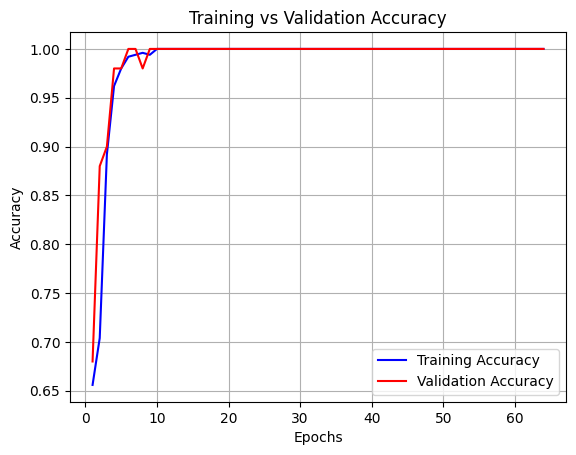

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b', label='Training Accuracy')
plt.plot(epochs, val_acc , color = 'r', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

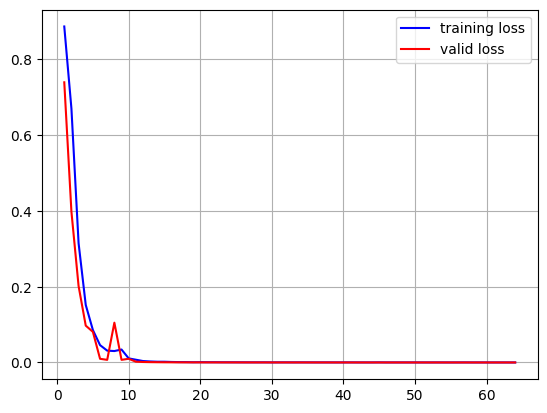

In [53]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b' , label = "training loss" )
plt.plot(epochs, val_acc , color = 'r'  , label= "valid loss")
plt.legend()
plt.grid(True)
plt.show()

# Saving Model

In [54]:
saved_model =model.save('my_model.h5')
saved_model

# Saving History

In [55]:
import json
with open('training_history.json' ,'w') as f:
  json.dump(history.history , f)

# Showing Confusion Matrix And Classification Reaport

* nloadi l model elli sajjalto wel history m3ah bech maghir mano93od kol marra nreni fih
* haw tw tel9a file esmo **my_model.h5** 3al github sobbo w7ot link direct
* kif kif bennnesba ll history


In [56]:
from pickle import load
from tensorflow.keras.models import load_model
model1 = load_model('/content/my_model.h5')

In [62]:
pred = model.predict(test_padded)
predicted_classes = np.argmax(pred, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [63]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)


In [64]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm

array([[ 3,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 34]])

In [65]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



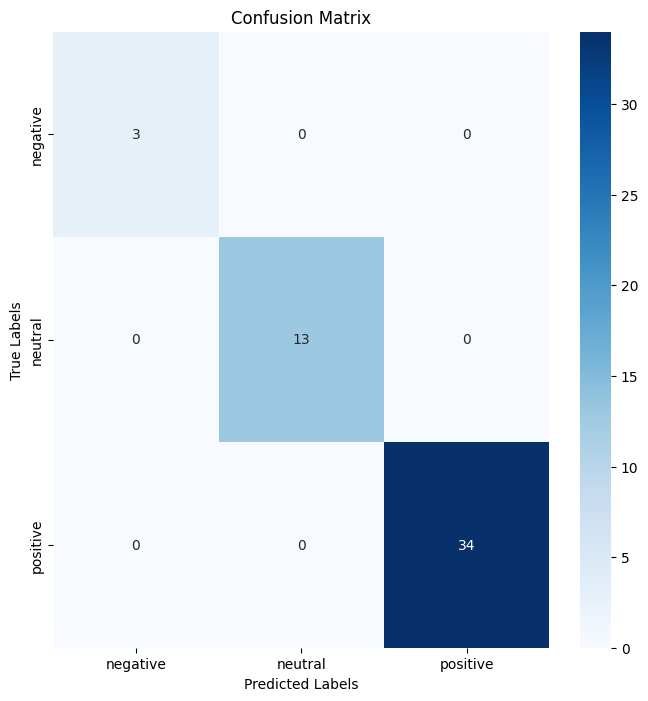

In [66]:
cm = confusion_matrix(y_true_classes, predicted_classes)

labels = ['negative', 'neutral', 'positive']

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [68]:
import numpy as np

# 1. Cleaning function (same one you used before)
def Cleaning_Texted_data(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# 2. Label decoder
label_decoder = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# 3. Function to predict sentiment of a new tweet
def predict_sentiment(tweet):
    cleaned = Cleaning_Texted_data(tweet)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=50, padding='post')
    pred = model.predict(padded)
    predicted_class = np.argmax(pred, axis=1)[0]
    sentiment = label_decoder[predicted_class]
    return sentiment


In [72]:
tweet = "I am not happy with the results!"
sentiment = predict_sentiment(tweet)
print(f"Predicted sentiment: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted sentiment: positive


# Prediction of Candidates

# **Lehne bech na3mlo nafs chay elli 3malneh m3a sentiment**

In [ ]:
df_train_cand = df_train['candidate']
df_valid_cand = df_val['candidate']
df_test_cand = df_test['candidate']

In [ ]:
df_train_Party = df_train['party']
df_Val_Party = df_val['party']
df_test_Party = df_test['party']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train_text)

train_sequences = tokenizer.texts_to_sequences(df_train_cand)
valid_sequences = tokenizer.texts_to_sequences(df_valid_cand)
test_sequences = tokenizer.texts_to_sequences(df_test_cand)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=50, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post')


all_labels = list(df_train['party']) + list(df_val['party']) + list(df_test['party'])

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['party'])
valid_labels = label_encoder.transform(df_val['party'])
test_labels = label_encoder.transform(df_test['party'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = np.array(train_labels).reshape(-1, 1)
valid_labels = np.array(valid_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)

print("Train input shape:", train_padded.shape)
print("Train label shape:", train_onehot_labels.shape)
print("Validation input shape:", valid_padded.shape)
print("Validation label shape:", valid_onehot_labels.shape)
print("Test input shape:", test_padded.shape)
print("Test label shape:", test_onehot_labels.shape)


Train input shape: (500, 50)
Train label shape: (500, 5)
Validation input shape: (50, 50)
Validation label shape: (50, 5)
Test input shape: (50, 50)
Test label shape: (50, 5)


In [ ]:
vocab_size = 10000
train_input = np.array(train_padded)
val_input = np.array(valid_padded)
test_input = np.array(test_padded)

# Use the correct label variables
train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

# Check shapes
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 5)
Validation input shape: (50, 50)
Validation label shape: (50, 5)
Test input shape: (50, 50)
Test label shape: (50, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=train_input))
model2.add(Bidirectional(LSTM(64, return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.3))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
type(train_input), type(train_label)


(numpy.ndarray, numpy.ndarray)

In [ ]:

history = model2.fit(
    train_input,
    train_label,
    epochs=70,
    batch_size=32,
    validation_data=(test_input, test_label)
)


Epoch 1/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.2438 - loss: 1.6005 - val_accuracy: 0.8000 - val_loss: 1.5316
Epoch 2/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7970 - loss: 1.4764 - val_accuracy: 1.0000 - val_loss: 1.0937
Epoch 3/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9578 - loss: 0.8458 - val_accuracy: 1.0000 - val_loss: 0.1236
Epoch 4/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9879 - loss: 0.1413 - val_accuracy: 1.0000 - val_loss: 0.0778
Epoch 5/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9957 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 0.0307
Epoch 6/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 7/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0264 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 8/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - v

In [ ]:
prediction = model2.predict(test_input)
predicted_classes = np.argmax(prediction, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


In [ ]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm

array([[10,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 10]])

In [ ]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



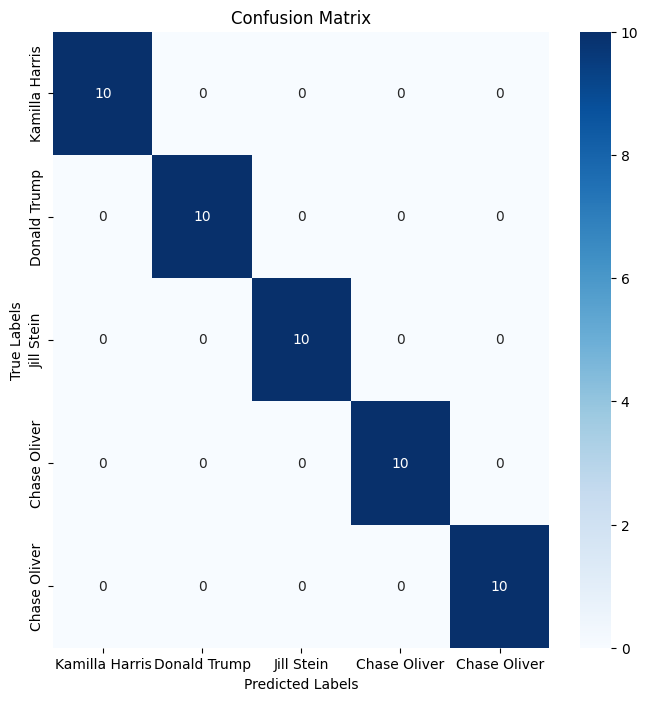

In [ ]:
cm = confusion_matrix(y_true_classes, predicted_classes)

labels = ["Kamilla Harris" , "Donald Trump" , "Jill Stein" , "Chase Oliver" , "Chase Oliver"]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Saving The Model

* Kif kif marra jeya ki bech tasti esta3ml l model elli msajel hetha
* loadih wa3ml kima t7eb tw tel9ah fi github esmo my_model2_candidate_prediction.h5

In [ ]:
saved_model =model2.save('my_model2_candidate_prediction.h5')
saved_model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = train_input.shape[1]


new_tweet =input('give a new tweet')

new_seq = tokenizer.texts_to_sequences([new_tweet])

new_padded = pad_sequences(new_seq, maxlen=max_len, padding='post')

prediction = model2.predict(new_padded)

predicted_class = np.argmax(prediction, axis=1)[0]

label_names = {
    0: "Camila Harris : Democrat Party",
    1: "Donald Trump : Republican Party",
    2: "Jill Stein : Green Party",
    3: "Chase Oliver : Libertian Party ",
    4: "Robert Kennedy : Independent Party"
}

print(f"Predicted class: {predicted_class}")
print(f"Predicted political orientation: {label_names.get(predicted_class, 'Unknown')}")
print(f"Prediction probabilities: {prediction}")


give a new tweettrump is the best candidate for the us elections
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted class: 1
Predicted political orientation: Republican
Prediction probabilities: [[4.7716778e-04 9.8747885e-01 6.2859985e-03 5.8881263e-04 5.1692245e-03]]
